<a href="https://colab.research.google.com/github/EvanWieland/Snitch/blob/main/SnitchApp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Download data

In [44]:
!wget https://github.com/EvanWieland/Snitch/raw/main/data.zip

--2021-09-01 13:41:27--  https://github.com/EvanWieland/Snitch/raw/main/data.zip
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/EvanWieland/Snitch/main/data.zip [following]
--2021-09-01 13:41:27--  https://raw.githubusercontent.com/EvanWieland/Snitch/main/data.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24477942 (23M) [application/zip]
Saving to: ‘data.zip’

data.zip            100%[===================>]  23.34M  --.-KB/s    in 0.1s    

2021-09-01 13:41:28 (187 MB/s) - ‘data.zip’ saved [24477942/24477942]



In [45]:
!rm -rf data

!unzip data.zip
!unzip data/prediction.zip -d data

# Clean up
!rm -rf __MACOSX/
!rm -rf data.zip

Archive:  data.zip
   creating: data/
  inflating: __MACOSX/._data         
  inflating: data/.DS_Store          
  inflating: __MACOSX/data/._.DS_Store  
  inflating: data/test.zip           
  inflating: data/prediction.zip     
  inflating: data/train.csv          
  inflating: __MACOSX/data/._train.csv  
  inflating: data/train.zip          
  inflating: data/sample_submission.csv  
  inflating: __MACOSX/data/._sample_submission.csv  
Archive:  data/prediction.zip
   creating: data/prediction/
  inflating: data/prediction/8.jpg   
  inflating: data/__MACOSX/prediction/._8.jpg  
  inflating: data/prediction/9.jpg   
  inflating: data/__MACOSX/prediction/._9.jpg  
  inflating: data/prediction/10.jpg  
  inflating: data/__MACOSX/prediction/._10.jpg  
  inflating: data/prediction/4.jpg   
  inflating: data/__MACOSX/prediction/._4.jpg  
  inflating: data/prediction/5.jpg   
  inflating: data/__MACOSX/prediction/._5.jpg  
  inflating: data/prediction/7.jpg   
  inflating: data/__MACOSX/p

# Download model

In [46]:
!wget -O model.h5 https://github.com/EvanWieland/Snitch/raw/main/epoch_60_finetuned.h5

--2021-09-01 13:41:29--  https://github.com/EvanWieland/Snitch/raw/main/epoch_60_finetuned.h5
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/EvanWieland/Snitch/main/epoch_60_finetuned.h5 [following]
--2021-09-01 13:41:29--  https://raw.githubusercontent.com/EvanWieland/Snitch/main/epoch_60_finetuned.h5
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24380840 (23M) [application/octet-stream]
Saving to: ‘model.h5’

model.h5            100%[===================>]  23.25M  --.-KB/s    in 0.1s    

2021-09-01 13:41:29 (180 MB/s) - ‘model.h5’ saved [24380840/24380840]



# Import deps

In [67]:
import tensorflow as tf
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import save_img
from keras.models import load_model
from IPython.display import Image, display

print(tf.__version__)

2.6.0


# Restore Model

In [48]:
model = load_model('model.h5')

# Image Preprocessor

In [85]:
def load_image(filename):
	# load the image
	img = load_img(filename, target_size=(96, 96))
	# convert to array
	img_array = img_to_array(img)
	# reshape into a single sample with 3 channels
	img = img_array.reshape(1, 96, 96, 3)
	# center pixel data
	img = img.astype('float32')
	img = img - [123.68, 116.779, 103.939]
	return img, img_array

# Predictor

In [94]:
def predict(image_path):
  # load the image
  img = load_image(image_path)
  # load model
  # predict the class
  result = model.predict(img[0])
  save_img('tmp.jpg', img[1])
  display(Image('tmp.jpg'))
  print(result[0])

# Run Prediction

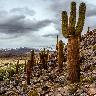

[0.08941609]


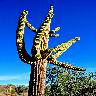

[0.3933967]


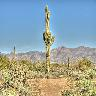

[0.9997447]


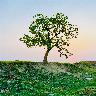

[0.9261003]


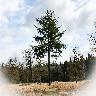

[0.8925047]


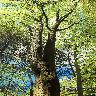

[0.99815094]


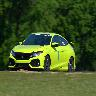

[0.03865165]


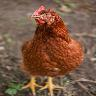

[0.81578696]


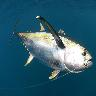

[0.24111658]


In [95]:
for i in range(1,10):
  img = "data/prediction/" + str(i) + ".jpg"
  predict(img);